<a href="https://colab.research.google.com/github/lililiyabbayx/CSE463--Computer-Vision/blob/main/KAN_CNN_test2_ok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install pykan
%pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.1/78.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d obulisainaren/retinal-oct-c8
!unzip retinal-oct-c8.zip


Streaming output truncated to the last 5000 lines.
  inflating: RetinalOCT_Dataset/RetinalOCT_Dataset/train/NORMAL/normal_train_1101.jpg  
  inflating: RetinalOCT_Dataset/RetinalOCT_Dataset/train/NORMAL/normal_train_1102.jpg  
  inflating: RetinalOCT_Dataset/RetinalOCT_Dataset/train/NORMAL/normal_train_1103.jpg  
  inflating: RetinalOCT_Dataset/RetinalOCT_Dataset/train/NORMAL/normal_train_1104.jpg  
  inflating: RetinalOCT_Dataset/RetinalOCT_Dataset/train/NORMAL/normal_train_1105.jpg  
  inflating: RetinalOCT_Dataset/RetinalOCT_Dataset/train/NORMAL/normal_train_1106.jpg  
  inflating: RetinalOCT_Dataset/RetinalOCT_Dataset/train/NORMAL/normal_train_1107.jpg  
  inflating: RetinalOCT_Dataset/RetinalOCT_Dataset/train/NORMAL/normal_train_1108.jpg  
  inflating: RetinalOCT_Dataset/RetinalOCT_Dataset/train/NORMAL/normal_train_1109.jpg  
  inflating: RetinalOCT_Dataset/RetinalOCT_Dataset/train/NORMAL/normal_train_1110.jpg  
  inflating: RetinalOCT_Dataset/RetinalOCT_Dataset/train/NORMAL/norma

In [ ]:
import os

# Correct dataset paths
base_dir = '/content/RetinalOCT_Dataset/RetinalOCT_Dataset'
train_dir = os.path.join(base_dir, 'train')
val_dir   = os.path.join(base_dir, 'val')
test_dir  = os.path.join(base_dir, 'test')

# Confirm folders
print("Train categories:", os.listdir(train_dir))
print("Validation categories:", os.listdir(val_dir))
print("Test categories:", os.listdir(test_dir))
import os

def count_images(dir_path):
    total = 0
    for cls in os.listdir(dir_path):
        cls_path = os.path.join(dir_path, cls)
        # only count files (skip any stray subdirs)
        files = [f for f in os.listdir(cls_path)
                 if os.path.isfile(os.path.join(cls_path, f))]
        total += len(files)
    return total


print(f"Training images:   {count_images(train_dir)}")
print(f"Validation images: {count_images(val_dir)}")
print(f"Test images:       {count_images(test_dir)}")



Train categories: ['DME', 'DR', 'NORMAL', 'CSR', 'DRUSEN', 'CNV', 'AMD', 'MH']
Validation categories: ['DME', 'DR', 'NORMAL', 'CSR', 'DRUSEN', 'CNV', 'AMD', 'MH']
Test categories: ['DME', 'DR', 'NORMAL', 'CSR', 'DRUSEN', 'CNV', 'AMD', 'MH']
Training images:   18400
Validation images: 2800
Test images:       2800


Categories: ['DME', 'DR', 'NORMAL', 'CSR', 'DRUSEN', 'CNV', 'AMD', 'MH']
Selected Category: DR


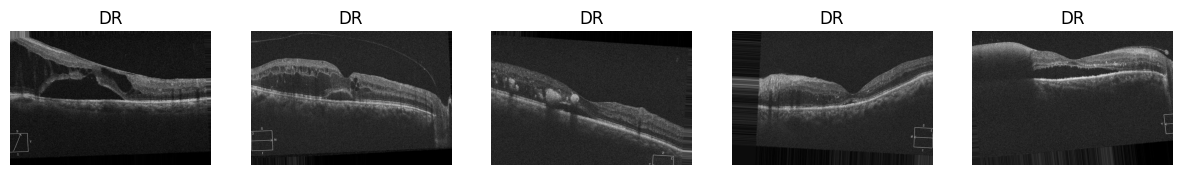

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import random

# Choose which dataset you want to visualize
dataset_dir = train_dir  # Or val_dir, test_dir

# List categories
categories = os.listdir(dataset_dir)
print("Categories:", categories)

# Pick a random category
selected_category = random.choice(categories)
print("Selected Category:", selected_category)

# List images
category_path = os.path.join(dataset_dir, selected_category)
images = os.listdir(category_path)

# Pick 5 random images
sample_images = random.sample(images, 5)

# Plot
plt.figure(figsize=(15, 5))
for i, img_name in enumerate(sample_images):
    img_path = os.path.join(category_path, img_name)
    img = Image.open(img_path)

    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(selected_category)
plt.show()


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),#converts a PIL IMG- numpy array  to a pytorch tensor cwh order
    transforms.Normalize((0.485, 0.456, 0.406),
                         (0.229, 0.224, 0.225)),
])
transform_test = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406),
                         (0.229, 0.224, 0.225)),
])

# Datasets and Loaders
batch_size = 64

#apply the transforms
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform_train)
val_dataset   = datasets.ImageFolder(root=val_dir,   transform=transform_test)
test_dataset  = datasets.ImageFolder(root=test_dir,  transform=transform_test)
#feed data in batches to train-eval,scan train_dir and sort alphabetically
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt
import math
from torchsummary import summary
from sklearn.metrics import classification_report
from torch.optim.lr_scheduler import OneCycleLR

In [ ]:
#combines a standard linear transformation with a learnable ,spline,

#a small grid of knots points and learns spline coefficitents so that for each input feature
#the layer can adaptively wrap the activation function itself

#in/out feature =like nn.linar--i/o dims
#grid=num of spline segments
#spline order=degree of bspline--3
#scale=for scaling factors for initialization
#base activation=took "silu" as default nonlinearity before the base linear transformation
#grid range=interval over which splines operate

class KANLinear(nn.Module):
    def __init__(self, in_features, out_features, grid_size=5, spline_order=3, scale_noise=0.1, scale_base=1.0, scale_spline=1.0, enable_standalone_scale_spline=True, base_activation=nn.SiLU, grid_eps=0.02, grid_range=[-1, 1]):
        super(KANLinear, self).__init__() #initialize parent nn.module
        self.in_features = in_features
        self.out_features = out_features
        self.grid_size = grid_size
        self.spline_order = spline_order

        #compute the initial uniform knot grid
        h = (grid_range[1] - grid_range[0]) / grid_size #step size=interval length/per segments
        grid = ((torch.arange(-spline_order, grid_size + spline_order + 1) * h + grid_range[0]).expand(in_features, -1).contiguous())
        self.register_buffer("grid", grid) #store grid so it moves with the module-gpu but isnt  a learnable parameter

        self.base_weight = nn.Parameter(torch.Tensor(out_features, in_features))#same as nn.linear weight
        self.spline_weight = nn.Parameter(torch.Tensor(out_features, in_features, grid_size + spline_order))#one set of spline coeff per o/i pair
        if enable_standalone_scale_spline:#optional per pair scale factor on the spline term
            self.spline_scaler = nn.Parameter(torch.Tensor(out_features, in_features))

        self.scale_noise = scale_noise
        self.scale_base = scale_base
        self.scale_spline = scale_spline
        self.enable_standalone_scale_spline = enable_standalone_scale_spline
        self.base_activation = base_activation()
        self.grid_eps = grid_eps

        self.reset_parameters()#initialize weight and spline coeff

    def reset_parameters(self):#init for base linear weights scaled by scale_base
        nn.init.kaiming_uniform_(self.base_weight, a=math.sqrt(5) * self.scale_base)
        with torch.no_grad():
            #Create small random perturbations for initializing the spline coefficients
            #then Project those random perturbations onto the B-spline basis via curve2coeff (least squares solve) and store in spline_weight
            #Perturbations = tiny random offsets around zero used to initialize the spline part.
            #Why: if we started our spline coefficients all exactly zero
            # the network might never learn a non-zero spline correction (“dead” parameters). A small random start breaks symmetry and encourages the spline to adapt during training.
            noise = ((torch.rand(self.grid_size + 1, self.in_features, self.out_features) - 1 / 2) * self.scale_noise / self.grid_size)
            self.spline_weight.data.copy_((self.scale_spline if not self.enable_standalone_scale_spline else 1.0) * self.curve2coeff(self.grid.T[self.spline_order : -self.spline_order], noise))
            if self.enable_standalone_scale_spline:
                nn.init.kaiming_uniform_(self.spline_scaler, a=math.sqrt(5) * self.scale_spline)
            #Optionally initialize the per-pair spline scalers.


    def b_splines(self, x: torch.Tensor):
        assert x.dim() == 2 and x.size(1) == self.in_features
        grid = self.grid
        x = x.unsqueeze(-1)
        bases = ((x >= grid[:, :-1]) & (x < grid[:, 1:])).to(x.dtype)
        for k in range(1, self.spline_order + 1):
            #de boors recursive formula for b spline
            bases = ((x - grid[:, : -(k + 1)]) / (grid[:, k:-1] - grid[:, : -(k + 1)]) * bases[:, :, :-1]) + ((grid[:, k + 1 :] - x) / (grid[:, k + 1 :] - grid[:, 1:(-k)]) * bases[:, :, 1:])
        assert bases.size() == (x.size(0), self.in_features, self.grid_size + self.spline_order)
        return bases.contiguous()


    #least sq solve for spline coeff c such that A.c~~B giving minimal error
    #solve A·c ≈ noise in least squares sense, where A is the B-spline basis matrix evaluated at grid positions. The result c are the actual spline weights.


    def curve2coeff(self, x: torch.Tensor, y: torch.Tensor):
        assert x.dim() == 2 and x.size(1) == self.in_features
        assert y.size() == (x.size(0), self.in_features, self.out_features)
        A = self.b_splines(x).transpose(0, 1)
        B = y.transpose(0, 1)
        solution = torch.linalg.lstsq(A, B).solution
        result = solution.permute(2, 0, 1)
        assert result.size() == (self.out_features, self.in_features, self.grid_size + self.spline_order)
        return result.contiguous()

    @property #applies the learned per pair scaler-if enabled to the raw spline coeff
    def scaled_spline_weight(self):
        return self.spline_weight * (self.spline_scaler.unsqueeze(-1) if self.enable_standalone_scale_spline else 1.0)


    #apply base activation(base=silu) and a standard linaer layer
    #compute b spline on each feature, flatten them then linearly combine with the spline coeff

    #the sum of the base linaer term and the spline based non linaer correction
    def forward(self, x: torch.Tensor):
        assert x.dim() == 2 and x.size(1) == self.in_features
        base_output = F.linear(self.base_activation(x), self.base_weight)
        spline_output = F.linear(self.b_splines(x).view(x.size(0), -1), self.scaled_spline_weight.view(self.out_features, -1))
        return base_output + spline_output

    @torch.no_grad()
    #adaptively refines the knot positions (self.grid) based on the distribution of x
    #recomputes spline weights so that the current layer remains unchanged under the new grid
    #encourages the grid to align with dense regions in the data, improving expressiveness
    def update_grid(self, x: torch.Tensor, margin=0.01):
        assert x.dim() == 2 and x.size(1) == self.in_features
        batch = x.size(0)
        splines = self.b_splines(x).permute(1, 0, 2)
        orig_coeff = self.scaled_spline_weight.permute(1, 2, 0)
        unreduced_spline_output = torch.bmm(splines, orig_coeff).permute(1, 0, 2)
        x_sorted = torch.sort(x, dim=0)[0]
        grid_adaptive = x_sorted[torch.linspace(0, batch - 1, self.grid_size + 1, dtype=torch.int64, device=x.device)]
        uniform_step = (x_sorted[-1] - x_sorted[0] + 2 * margin) / self.grid_size
        grid_uniform = (torch.arange(self.grid_size + 1, dtype=torch.float32, device=x.device).unsqueeze(1) * uniform_step + x_sorted[0] - margin)
        grid = self.grid_eps * grid_uniform + (1 - self.grid_eps) * grid_adaptive
        grid = torch.cat([grid[:1] - uniform_step * torch.arange(self.spline_order, 0, -1, device=x.device).unsqueeze(1), grid, grid[-1:] + uniform_step * torch.arange(1, self.spline_order + 1, device=x.device).unsqueeze(1)], dim=0)
        self.grid.copy_(grid.T)
        self.spline_weight.data.copy_(self.curve2coeff(x, unreduced_spline_output))


    #penalty on spline weights -- sparsity /activation cost
    #entropy of the L1 distribution--encourages diversity in which features use splines
    def regularization_loss(self, regularize_activation=1.0, regularize_entropy=1.0):
        l1_fake = self.spline_weight.abs().mean(-1)
        regularization_loss_activation = l1_fake.sum()
        p = l1_fake / regularization_loss_activation
        regularization_loss_entropy = -torch.sum(p * p.log())
        return regularize_activation * regularization_loss_activation + regularize_entropy * regularization_loss_entropy


In [ ]:
class CNNKAN(nn.Module):
    def __init__(self):
        super(CNNKAN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(2)#2x2 maxpool stride 2--16
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(2)
        self.kan1 = KANLinear(64 * 8 * 8, 256)#why 64 8 8 is this pruning? should write a sep kan pruning function
        self.kan2 = KANLinear(256, 100)

    def forward(self, x):
        x = F.selu(self.conv1(x))
        x = self.pool1(x)
        x = F.selu(self.conv2(x))
        x = self.pool2(x)
        print(x.size())
        print(x.shape)
        x = x.view(x.size(0), -1)
        print(x.size())
        print(x.shape)
        x = self.kan1(x)
        x = self.kan2(x)
        return x


In [ ]:
class CustomResNetKAN(nn.Module):
    def __init__(self, num_classes=8):  # ✔ num_classes=8
        super(CustomResNetKAN, self).__init__()
        self.model = models.resnet50(pretrained=True)
        self.model.fc = KANLinear(self.model.fc.in_features, num_classes)
    def forward(self, x):
        return self.model(x)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

Validating: 100%|██████████| 44/44 [00:26<00:00,  1.65batch/s]


Epoch 001/20 — Train Loss: 0.9012, Train Acc: 69.24%, Val Loss: 0.2392, Val Acc: 92.36%, Epoch Time: 303.74s

Epoch 2/20 started...


Validating: 100%|██████████| 44/44 [00:26<00:00,  1.66batch/s]


Epoch 002/20 — Train Loss: 0.3361, Train Acc: 87.27%, Val Loss: 0.1463, Val Acc: 95.25%, Epoch Time: 298.11s

Epoch 3/20 started...


Validating: 100%|██████████| 44/44 [00:27<00:00,  1.61batch/s]


Epoch 003/20 — Train Loss: 0.2783, Train Acc: 89.51%, Val Loss: 0.1339, Val Acc: 95.46%, Epoch Time: 303.18s

Epoch 4/20 started...


Validating: 100%|██████████| 44/44 [00:26<00:00,  1.65batch/s]


Epoch 004/20 — Train Loss: 0.2516, Train Acc: 90.21%, Val Loss: 0.1093, Val Acc: 96.07%, Epoch Time: 297.70s

Epoch 5/20 started...


Validating: 100%|██████████| 44/44 [00:27<00:00,  1.63batch/s]


Epoch 005/20 — Train Loss: 0.2325, Train Acc: 91.16%, Val Loss: 0.0967, Val Acc: 96.57%, Epoch Time: 296.62s

Epoch 6/20 started...


Validating: 100%|██████████| 44/44 [00:26<00:00,  1.66batch/s]


Epoch 006/20 — Train Loss: 0.2147, Train Acc: 91.43%, Val Loss: 0.0902, Val Acc: 96.75%, Epoch Time: 299.94s

Epoch 7/20 started...


Validating: 100%|██████████| 44/44 [00:26<00:00,  1.67batch/s]


Epoch 007/20 — Train Loss: 0.2152, Train Acc: 91.60%, Val Loss: 0.0912, Val Acc: 96.79%, Epoch Time: 296.85s

Epoch 8/20 started...


Validating: 100%|██████████| 44/44 [00:26<00:00,  1.66batch/s]


Epoch 008/20 — Train Loss: 0.2049, Train Acc: 92.16%, Val Loss: 0.0977, Val Acc: 96.57%, Epoch Time: 296.61s

Epoch 9/20 started...


Validating: 100%|██████████| 44/44 [00:26<00:00,  1.63batch/s]


Epoch 009/20 — Train Loss: 0.1980, Train Acc: 92.43%, Val Loss: 0.0837, Val Acc: 97.00%, Epoch Time: 296.87s

Epoch 10/20 started...


Validating: 100%|██████████| 44/44 [00:26<00:00,  1.66batch/s]


Epoch 010/20 — Train Loss: 0.1945, Train Acc: 92.59%, Val Loss: 0.0800, Val Acc: 97.39%, Epoch Time: 297.38s

Epoch 11/20 started...


Validating: 100%|██████████| 44/44 [00:27<00:00,  1.62batch/s]


Epoch 011/20 — Train Loss: 0.1882, Train Acc: 92.76%, Val Loss: 0.0794, Val Acc: 97.32%, Epoch Time: 298.28s

Epoch 12/20 started...


Validating: 100%|██████████| 44/44 [00:26<00:00,  1.66batch/s]


Epoch 012/20 — Train Loss: 0.1791, Train Acc: 92.91%, Val Loss: 0.0793, Val Acc: 97.21%, Epoch Time: 298.52s

Epoch 13/20 started...


Validating: 100%|██████████| 44/44 [00:26<00:00,  1.66batch/s]


Epoch 013/20 — Train Loss: 0.1772, Train Acc: 93.33%, Val Loss: 0.0724, Val Acc: 97.68%, Epoch Time: 303.87s

Epoch 14/20 started...


Validating: 100%|██████████| 44/44 [00:26<00:00,  1.63batch/s]


Epoch 014/20 — Train Loss: 0.1802, Train Acc: 92.96%, Val Loss: 0.0738, Val Acc: 97.43%, Epoch Time: 300.97s

Epoch 15/20 started...


Validating: 100%|██████████| 44/44 [00:26<00:00,  1.65batch/s]


Epoch 015/20 — Train Loss: 0.1728, Train Acc: 93.42%, Val Loss: 0.0803, Val Acc: 97.36%, Epoch Time: 299.32s

Epoch 16/20 started...


Validating: 100%|██████████| 44/44 [00:26<00:00,  1.66batch/s]


Epoch 016/20 — Train Loss: 0.1737, Train Acc: 93.14%, Val Loss: 0.0816, Val Acc: 97.32%, Epoch Time: 298.39s

Epoch 17/20 started...


Validating: 100%|██████████| 44/44 [00:26<00:00,  1.66batch/s]


Epoch 017/20 — Train Loss: 0.1657, Train Acc: 93.59%, Val Loss: 0.0749, Val Acc: 97.75%, Epoch Time: 297.94s

Epoch 18/20 started...


Validating: 100%|██████████| 44/44 [00:26<00:00,  1.68batch/s]


Epoch 018/20 — Train Loss: 0.1645, Train Acc: 93.56%, Val Loss: 0.0737, Val Acc: 97.68%, Epoch Time: 298.19s

Epoch 19/20 started...


Validating: 100%|██████████| 44/44 [00:26<00:00,  1.67batch/s]


Epoch 019/20 — Train Loss: 0.1566, Train Acc: 93.97%, Val Loss: 0.0688, Val Acc: 98.04%, Epoch Time: 296.88s

Epoch 20/20 started...


Validating: 100%|██████████| 44/44 [00:26<00:00,  1.64batch/s]


Epoch 020/20 — Train Loss: 0.1593, Train Acc: 93.95%, Val Loss: 0.0738, Val Acc: 97.82%, Epoch Time: 298.33s


Testing: 100%|██████████| 44/44 [00:26<00:00,  1.67batch/s]

Test Loss: 0.0726, Test Acc: 97.50%


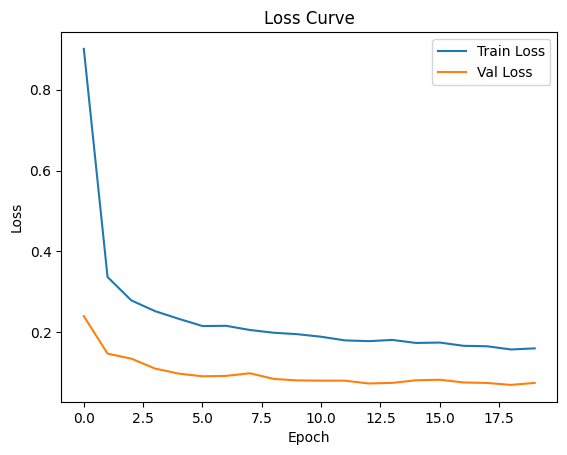

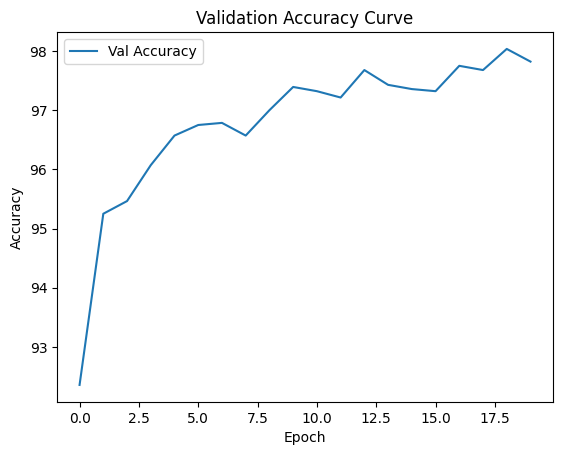

In [ ]:
import time
from tqdm import tqdm
#device and model setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model  = CustomResNetKAN(num_classes=8).to(device)

# Wrap for multi-GPU if available
if torch.cuda.device_count() > 1:
    model = nn.DataParallel(model)#split batches across gpu

# Print summary & parameter info of the architecture
summary(model, input_size=(3, 224, 224))#shows layer and output shape

def print_parameter_details(m):
    for name, p in m.named_parameters():
        state = 'requires_grad' if p.requires_grad else 'frozen'
        print(f"{name}: {tuple(p.size())} ({state})") #print each tensors shape and whether its trainable

print(model)
print_parameter_details(model)

# Loss, Optimizer, Scheduler
criterion = nn.CrossEntropyLoss()#multiclass loss combining logsoftmax+nllloss
optimizer = optim.SGD(
    model.parameters(),#all trainable parameter
    lr=1e-2,
    momentum=0.9,
    weight_decay=5e-4 #l2 reg
)
scheduler = OneCycleLR(
    optimizer,
    max_lr=1e-2,
    steps_per_epoch=len(train_loader),
    epochs=20  # Set to 20 epochs
)

#Training Loop with Early Stopping

best_val_loss = float('inf') #init best val
patience = 10
patience_counter = 0

train_losses, val_losses, val_accuracies = [], [], [] #to store per epoch

for epoch in range(1, 21):  # Iterate for 20 epochs
    print(f"\nEpoch {epoch}/{20} started...")  # Display epoch number
    epoch_start_time = time.time()

    #training
    model.train()
    running_train_loss = 0.0
    train_correct = 0
    for inputs, labels in tqdm(train_loader, desc="Training", unit="batch"):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()#clear prev gradients
        outputs = model(inputs)  # forward pass [B, 8]
        loss = criterion(outputs, labels)  # CrossEntropy
        loss.backward()#backprop
        optimizer.step()#update parameter
        running_train_loss += loss.item() * inputs.size(0)#total batch loss
        preds = outputs.argmax(dim=1)
        train_correct += (preds == labels).sum().item()
    #avg training loss and accuracy for epoch
    train_loss = running_train_loss / len(train_loader.dataset)
    train_acc = 100. * train_correct / len(train_loader.dataset)
    train_losses.append(train_loss)

    #validate
    model.eval()
    running_val_loss = 0.0
    val_correct = 0
    with torch.no_grad():
        for inputs, labels in tqdm(val_loader, desc="Validating", unit="batch"):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            running_val_loss += criterion(outputs, labels).item() * inputs.size(0)
            preds = outputs.argmax(dim=1)
            val_correct += (preds == labels).sum().item()

    val_loss = running_val_loss / len(val_loader.dataset)
    val_acc = 100. * val_correct / len(val_loader.dataset)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    # Scheduler step
    scheduler.step()

    epoch_end_time = time.time()
    epoch_duration = epoch_end_time - epoch_start_time

    # Print progress for each epoch
    print(f"Epoch {epoch:03d}/20 — "
          f"Train Loss: {train_loss:.4f}, "
          f"Train Acc: {train_acc:.2f}%, "
          f"Val Loss: {val_loss:.4f}, "
          f"Val Acc: {val_acc:.2f}%, "
          f"Epoch Time: {epoch_duration:.2f}s")

    # Early stopping & model checkpoint
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), 'best_model_resnet50_KAN.pth')
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

#Load Best Model & Test Evaluation

model.load_state_dict(torch.load('best_model_resnet50_KAN.pth', map_location=device))
model.eval()

running_test_loss = 0.0
test_correct = 0
with torch.no_grad():
    for inputs, labels in tqdm(test_loader, desc="Testing", unit="batch"):
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        running_test_loss += criterion(outputs, labels).item() * inputs.size(0)
        preds = outputs.argmax(dim=1)
        test_correct += (preds == labels).sum().item()

test_loss = running_test_loss / len(test_loader.dataset)
test_acc = 100. * test_correct / len(test_loader.dataset)
print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

#Plot Loss & Accuracy Curves
import matplotlib.pyplot as plt

plt.figure()
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

plt.figure()
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Curve')
plt.legend()
plt.show()


Training accuracy: 93.95%
Train loss: 0.1593
Validation accuracy: 97.82%
Validation loss: 0.0738

Test Loss: 0.0726, Test Accuracy: 97.50%


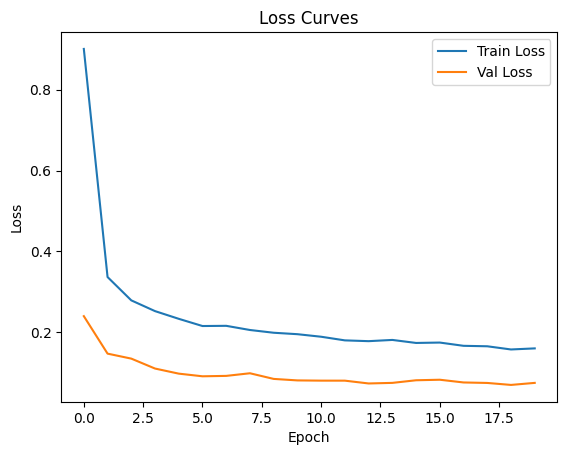

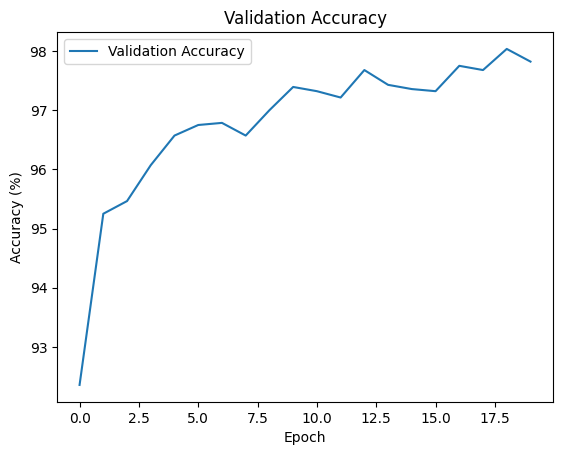

Class names: ['AMD', 'CNV', 'CSR', 'DME', 'DR', 'DRUSEN', 'MH', 'NORMAL']


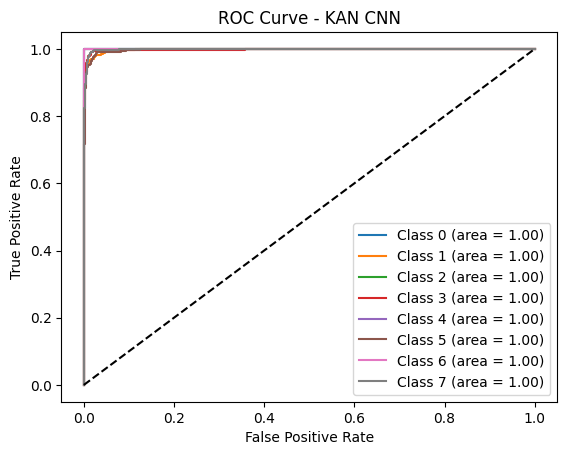

Accuracy: 0.9750
Precision: 0.9751
Recall: 0.9750
F1 Score: 0.9750
Classification Report:
               precision    recall  f1-score   support

         AMD       1.00      1.00      1.00       350
         CNV       0.96      0.95      0.95       350
         CSR       1.00      1.00      1.00       350
         DME       0.96      0.95      0.96       350
          DR       1.00      1.00      1.00       350
      DRUSEN       0.94      0.95      0.94       350
          MH       1.00      1.00      1.00       350
      NORMAL       0.94      0.96      0.95       350

    accuracy                           0.97      2800
   macro avg       0.98      0.97      0.98      2800
weighted avg       0.98      0.97      0.98      2800



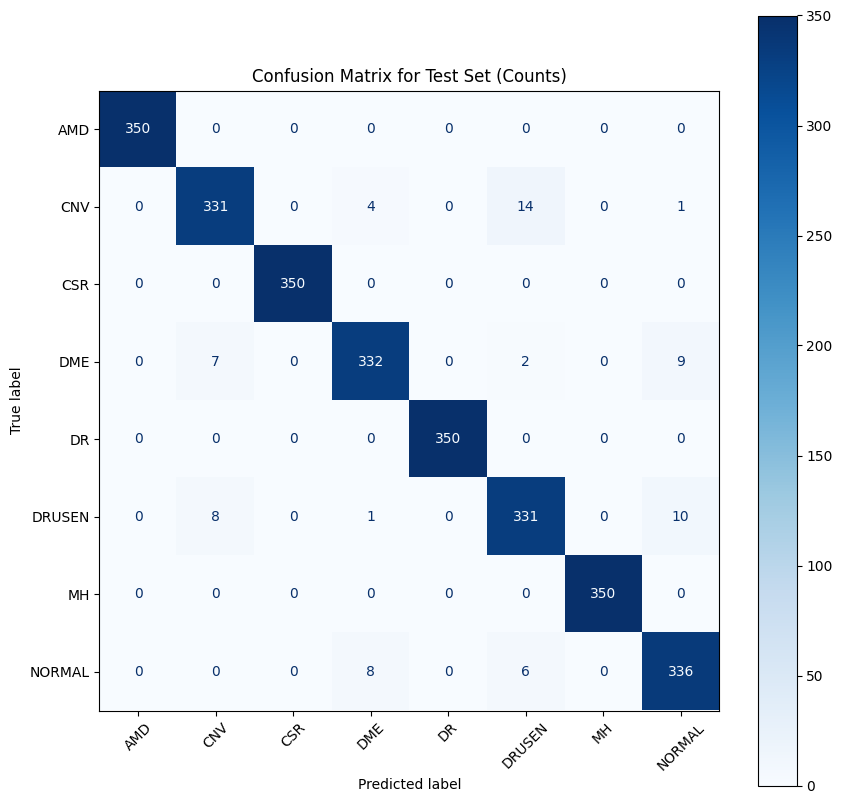

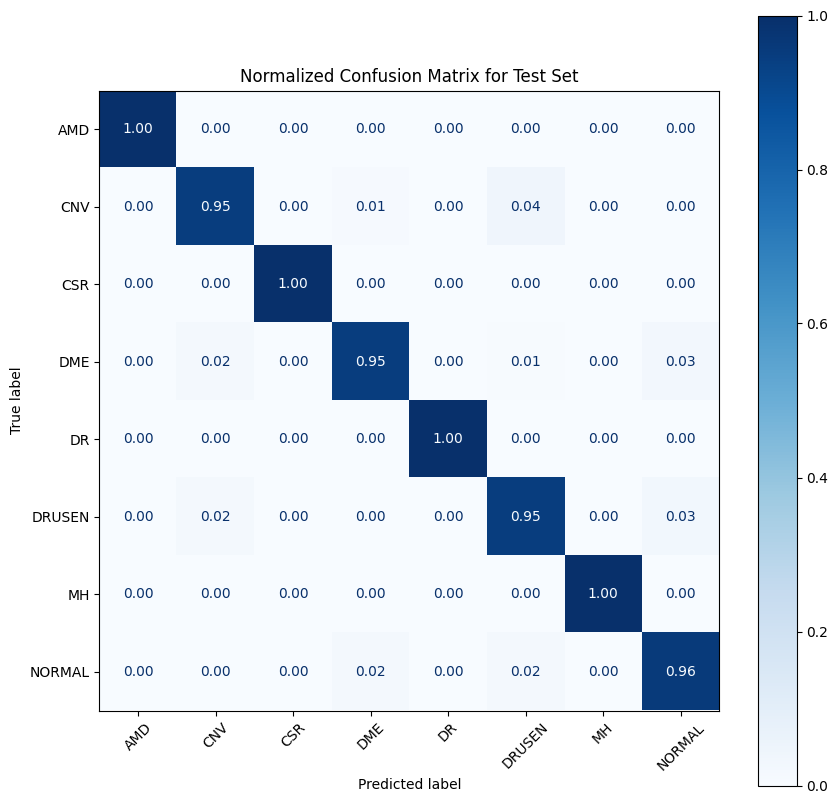

In [ ]:
from sklearn.metrics import roc_curve, auc
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc
)

# Print training and validation metrics
print(f"Training accuracy: {train_acc:.2f}%")
print(f"Train loss: {train_loss:.4f}")
print(f"Validation accuracy: {val_acc:.2f}%")
print(f"Validation loss: {val_loss:.4f}")

# Reload the best model
model.load_state_dict(torch.load('best_model_resnet50_KAN.pth', map_location=device))
model.eval() #load weights into model and set model to eval mode

# Test set evaluation
running_test_loss = 0.0
correct = 0
with torch.no_grad():
    for inputs, labels in test_loader:#iterate over test
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        running_test_loss += criterion(outputs, labels).item() * inputs.size(0)
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()

test_loss = running_test_loss / len(test_loader.dataset)
test_acc = 100. * correct / len(test_loader.dataset)

print(f"\nTest Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")

# Plot loss curves
plt.figure()
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()
plt.show()

# Plot validation accuracy
plt.figure()
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy')
plt.legend()
plt.show()

# Functions for metrics and ROC curve
def get_predictions_and_labels(model, test_loader, device):
    model.eval()
    preds = []
    true_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            preds.extend(torch.softmax(outputs, dim=1).cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
    return np.array(preds), np.array(true_labels)

def plot_roc_curve(true_labels, preds, num_classes):
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(true_labels == i, preds[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    plt.figure()
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - KAN CNN')
    plt.legend(loc='lower right')
    plt.show()

def print_classification_metrics(true_labels, preds, class_names):
    accuracy = accuracy_score(true_labels, preds)
    precision = precision_score(true_labels, preds, average='weighted')
    recall = recall_score(true_labels, preds, average='weighted')
    f1 = f1_score(true_labels, preds, average='weighted')
    report = classification_report(true_labels, preds, target_names=class_names)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print('Classification Report:\n', report)


# Get class names from your train dataset
class_names = train_dataset.classes  # ['DME', 'DR', 'NORMAL', 'CSR', 'DRUSEN', 'CNV', 'AMD', 'MH']
print("Class names:", class_names)


# Get predictions
preds, true_labels = get_predictions_and_labels(model, test_loader, device)
preds_class = np.argmax(preds, axis=1)

# Plot ROC curve and print classification metrics
plot_roc_curve(true_labels, preds, num_classes=8)
print_classification_metrics(true_labels, preds_class, class_names)  # No num_classes argument




# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate confusion matrix
cm = confusion_matrix(true_labels, preds_class)

# Plot confusion matrix (unnormalized)
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(ax=ax, cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix for Test Set (Counts)")
plt.xticks(rotation=45)
plt.show()

# Normalized Confusion Matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=class_names)
disp.plot(ax=ax, cmap=plt.cm.Blues, values_format='.2f')
plt.title("Normalized Confusion Matrix for Test Set")
plt.xticks(rotation=45)
plt.show()



Saving dr_test_1002.jpg to dr_test_1002.jpg


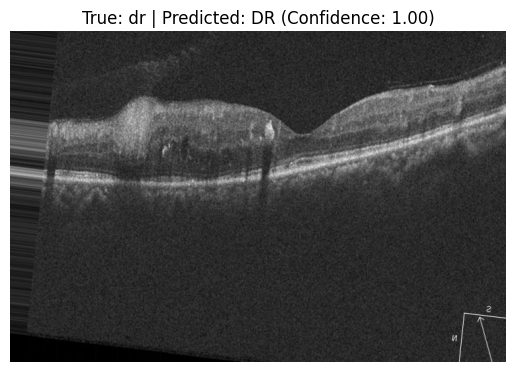

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
from torchvision import transforms
from google.colab import files  # Import the necessary module for file uploads in Colab

# Define transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Load and preprocess uploaded image
def load_and_preprocess_image(img_bytes):
    img = Image.open(BytesIO(img_bytes)).convert('RGB')
    img_tensor = transform(img).unsqueeze(0).to(device)
    return img, img_tensor

# Predict and Display
def predict_and_display(img, img_tensor, true_class):
    model.eval()
    with torch.no_grad():
        output = model(img_tensor)
        prob = torch.softmax(output, dim=1).cpu().numpy().flatten()
        predicted_class = np.argmax(prob)

    # Get class name from the predicted class index
    predicted_class_name = class_names[predicted_class]

    # Display the image with predicted class and confidence
    plt.imshow(np.array(img))
    plt.axis('off')
    plt.title(f"True: {true_class} | Predicted: {predicted_class_name} (Confidence: {prob[predicted_class]:.2f})")
    plt.show()

# Upload handler
def handle_upload():
    uploaded = files.upload()  # This works in Google Colab
    for name, data in uploaded.items():
        img, img_tensor = load_and_preprocess_image(data)

        # Here, you will need the true class of the image
        # Assuming the file name contains the true class (for example 'class_name_image.jpg')
        true_class = name.split('_')[0]  # This depends on your file naming convention

        predict_and_display(img, img_tensor, true_class)

# Run upload + prediction
handle_upload()


Saving mh_test_1001.jpg to mh_test_1001 (2).jpg


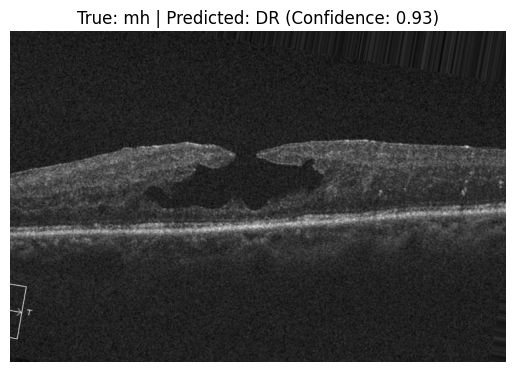

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
from torchvision import transforms
from google.colab import files  # Import the necessary module for file uploads in Colab

# Define transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Load and preprocess uploaded image
def load_and_preprocess_image(img_bytes):
    img = Image.open(BytesIO(img_bytes)).convert('RGB')
    img_tensor = transform(img).unsqueeze(0).to(device)
    return img, img_tensor

# Predict and Display
def predict_and_display(img, img_tensor, true_class):
    model.eval()
    with torch.no_grad():
        output = model(img_tensor)
        prob = torch.softmax(output, dim=1).cpu().numpy().flatten()
        predicted_class = np.argmax(prob)

    # Get class name from the predicted class index
    predicted_class_name = class_names[predicted_class]

    # Display the image with predicted class and confidence
    plt.imshow(np.array(img))
    plt.axis('off')
    plt.title(f"True: {true_class} | Predicted: {predicted_class_name} (Confidence: {prob[predicted_class]:.2f})")
    plt.show()

# Upload handler
def handle_upload():
    uploaded = files.upload()  # This works in Google Colab
    for name, data in uploaded.items():
        img, img_tensor = load_and_preprocess_image(data)

        # Here, you will need the true class of the image
        # Assuming the file name contains the true class (for example 'class_name_image.jpg')
        true_class = name.split('_')[0]  # This depends on your file naming convention

        predict_and_display(img, img_tensor, true_class)

# Run upload + prediction
handle_upload()
